In [1]:
from importlib import reload
import json
import itertools
from pickle import loads, dumps
from tqdm import tqdm_notebook as tqdm
from glob import glob
from copy import deepcopy
from os.path import isfile, isdir, exists
import numpy as np
import re
import nltk


In [2]:
from trefier.models import seq2seq
reload(seq2seq)

Using TensorFlow backend.


<module 'trefier.models.seq2seq' from '/home/marian/projects/trefier-backend/trefier/models/seq2seq.py'>

In [3]:
def train(path: str):
    assert path
    if seq2seq.Seq2SeqModel.verify_loadable(path):
        print("Loading from disk")
        return seq2seq.Seq2SeqModel.load(path)
    model = seq2seq.Seq2SeqModel()
    model.train(epochs=50, glove_ncomponents=10)
    model.save(path)
    return model


In [4]:
model = train('seq2seq.model')

Loading from disk
Instructions for updating:
Colocations handled automatically by placer.
Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.
Instructions for updating:
Use tf.cast instead.


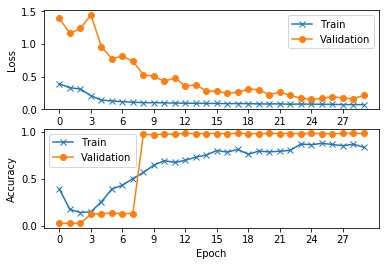

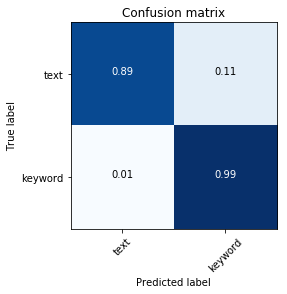

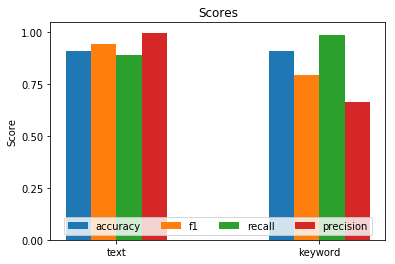

In [5]:
model.evaluation.plot()

In [6]:
tags = model.predict('data/smglom/primes/source/balancedprime.en.tex')

In [14]:
[
                    tuple(items)
                    for key, items
                    in filter(
                        lambda g: g[0] > 0.5,
                        itertools.groupby(tags, key=lambda tag: tag.label.round())
                    )
                ]

[(arithmetic:1.0, mean:1.0), ($n$:1.0, th:1.0, prime:1.0, number:1.0)]